In [37]:
from datetime import date, timedelta
start_date = date(2025, 7, 1)
end_date = (start_date + timedelta(days=32)).replace(day=1)

/tmp/ipykernel_2229/830196484.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month.replace(0, nan_value, inplace=True)
/tmp/ipykernel_2229/830196484.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month.replace("", nan_value, inplace=True)
/tmp/ipykernel_2229/830196484.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month.dropna(how='all', axis=1, inplace=True)


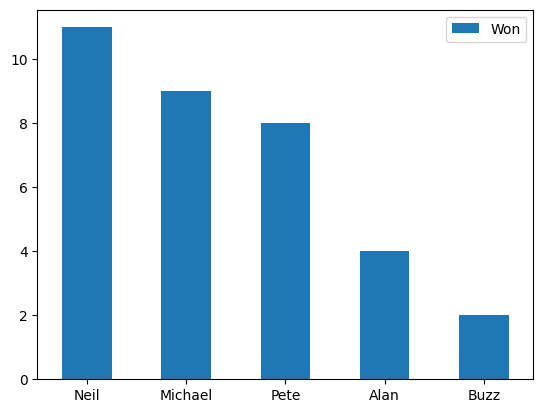

In [ ]:
import sys

sys.path.append("/workspaces/leaderboard/")
import pandas as pd
import matplotlib.pyplot as plt
from wordle import (
    load_chats,
    clean_chats,
    parse_plays,
    group_plays_by_date_and_game,
    assign_medals,
    day_results_per_player,
)

chats = load_chats("../data/export.zip", "_chat.txt")
chats = clean_chats(chats)
plays = parse_plays(chats)
grouped = group_plays_by_date_and_game(plays)
assign_medals(grouped)
persons = day_results_per_player(grouped)

# load dataframe from json object
df = pd.DataFrame(persons)
df["Won"] = df["position"]

month = df[(df["day"] >= start_date) & (df["day"] < end_date)]

aggs = {
    "Won": pd.NamedAgg(column="position", aggfunc=lambda x: (x == 1).sum()),
    "W": pd.NamedAgg(column="wordleMedal", aggfunc=lambda x: (x == "G").sum()),
    "🌀": pd.NamedAgg(column="obsessieMedal", aggfunc=lambda x: (x == "G").sum()),
    "🥕": pd.NamedAgg(column="wortelMedal", aggfunc=lambda x: (x == "G").sum()),
    "N": pd.NamedAgg(column="nerdleMedal", aggfunc=lambda x: (x == "G").sum()),
    "O": pd.NamedAgg(column="octordleMedal", aggfunc=lambda x: (x == "G").sum()),
    "SO": pd.NamedAgg(
        column="sequenceOctordleMedal", aggfunc=lambda x: (x == "G").sum()
    ),
    "Q": pd.NamedAgg(column="quordleMedal", aggfunc=lambda x: (x == "G").sum()),
    "SQ": pd.NamedAgg(
        column="sequenceQuordleMedal", aggfunc=lambda x: (x == "G").sum()
    ),
    "5G": pd.NamedAgg(column="golds", aggfunc=lambda x: (x == 5).sum()),
    "6G": pd.NamedAgg(column="golds", aggfunc=lambda x: (x == 6).sum()),
    "7G": pd.NamedAgg(column="golds", aggfunc=lambda x: (x == 7).sum()),
}

per_game_stats = month.groupby("name", as_index=False).agg(
    **{k: v for k, v in aggs.items() if v.column in df.columns}
)

month_wins = (
    month.groupby("name")
    .agg(
        {
            "Won": lambda x: (x == 1).sum(),
        }
    )
    .sort_values(by=["Won"], ascending=False)
)
month_wins.plot(kind="bar", rot=0)
plt.xlabel("")
plt.show()

In [39]:
from IPython.display import HTML
HTML(per_game_stats.to_html(index=False))

name,Won,W,🌀,N,O,SO,Q,SQ,5G,6G,7G
Alan,4,12,3,16,1,3,7,8,1,0,0
Buzz,2,9,2,10,0,6,6,10,0,0,0
Michael,9,10,4,22,13,8,6,9,0,0,0
Neil,11,7,4,16,16,13,14,7,0,0,0
Pete,8,15,5,17,7,7,10,6,0,0,0
